In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_absolute_percentage_error

In [2]:
df=pd.read_csv("abalone.csv")
print(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.4

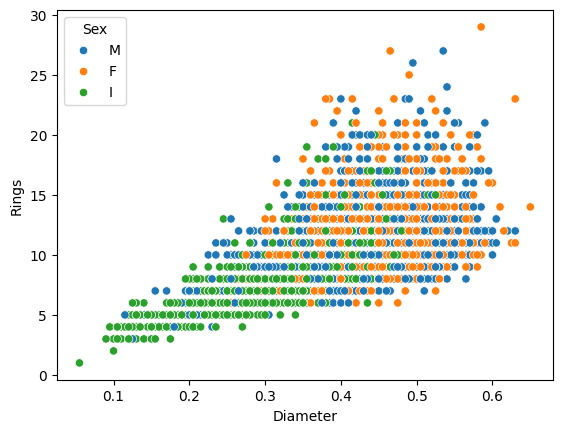

In [3]:
sns.scatterplot(x=df["Diameter"],y=df["Rings"],hue=df["Sex"])
plt.show()

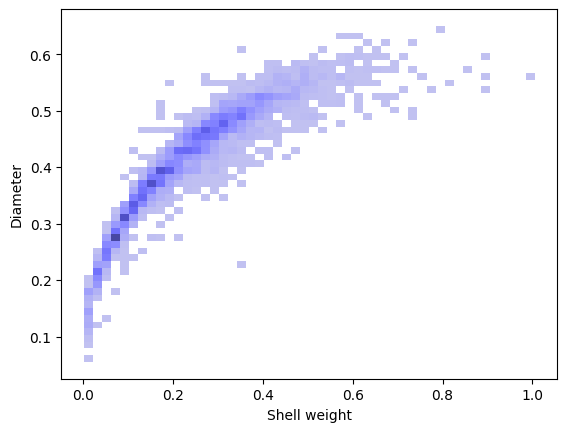

In [4]:
sns.histplot(x=df["Shell weight"],y=df["Diameter"],bins=50,color="blue")
plt.show()

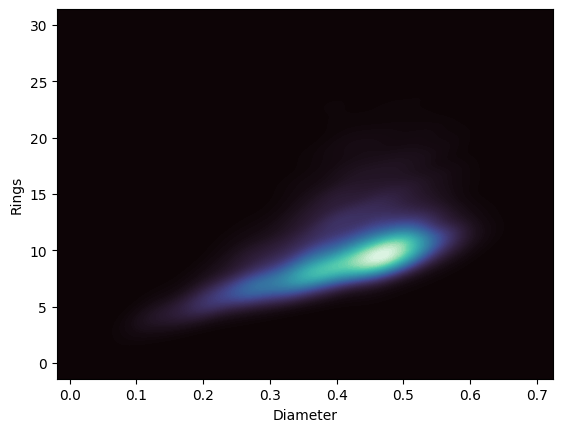

In [5]:
sns.kdeplot(x=df["Diameter"],y=df["Rings"],fill=True,cmap="mako",levels=100,thresh=0)
plt.show()

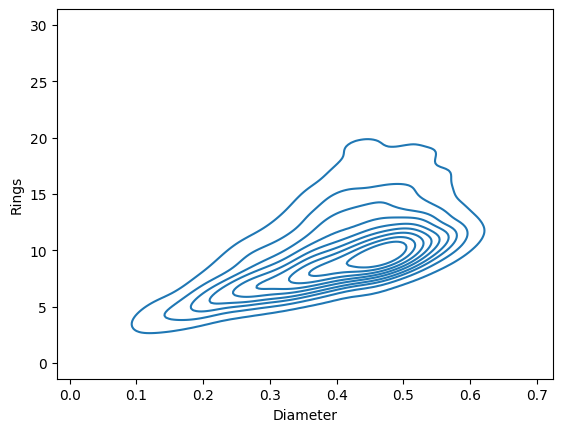

In [6]:
sns.kdeplot(x=df["Diameter"],y=df["Rings"])
plt.show()

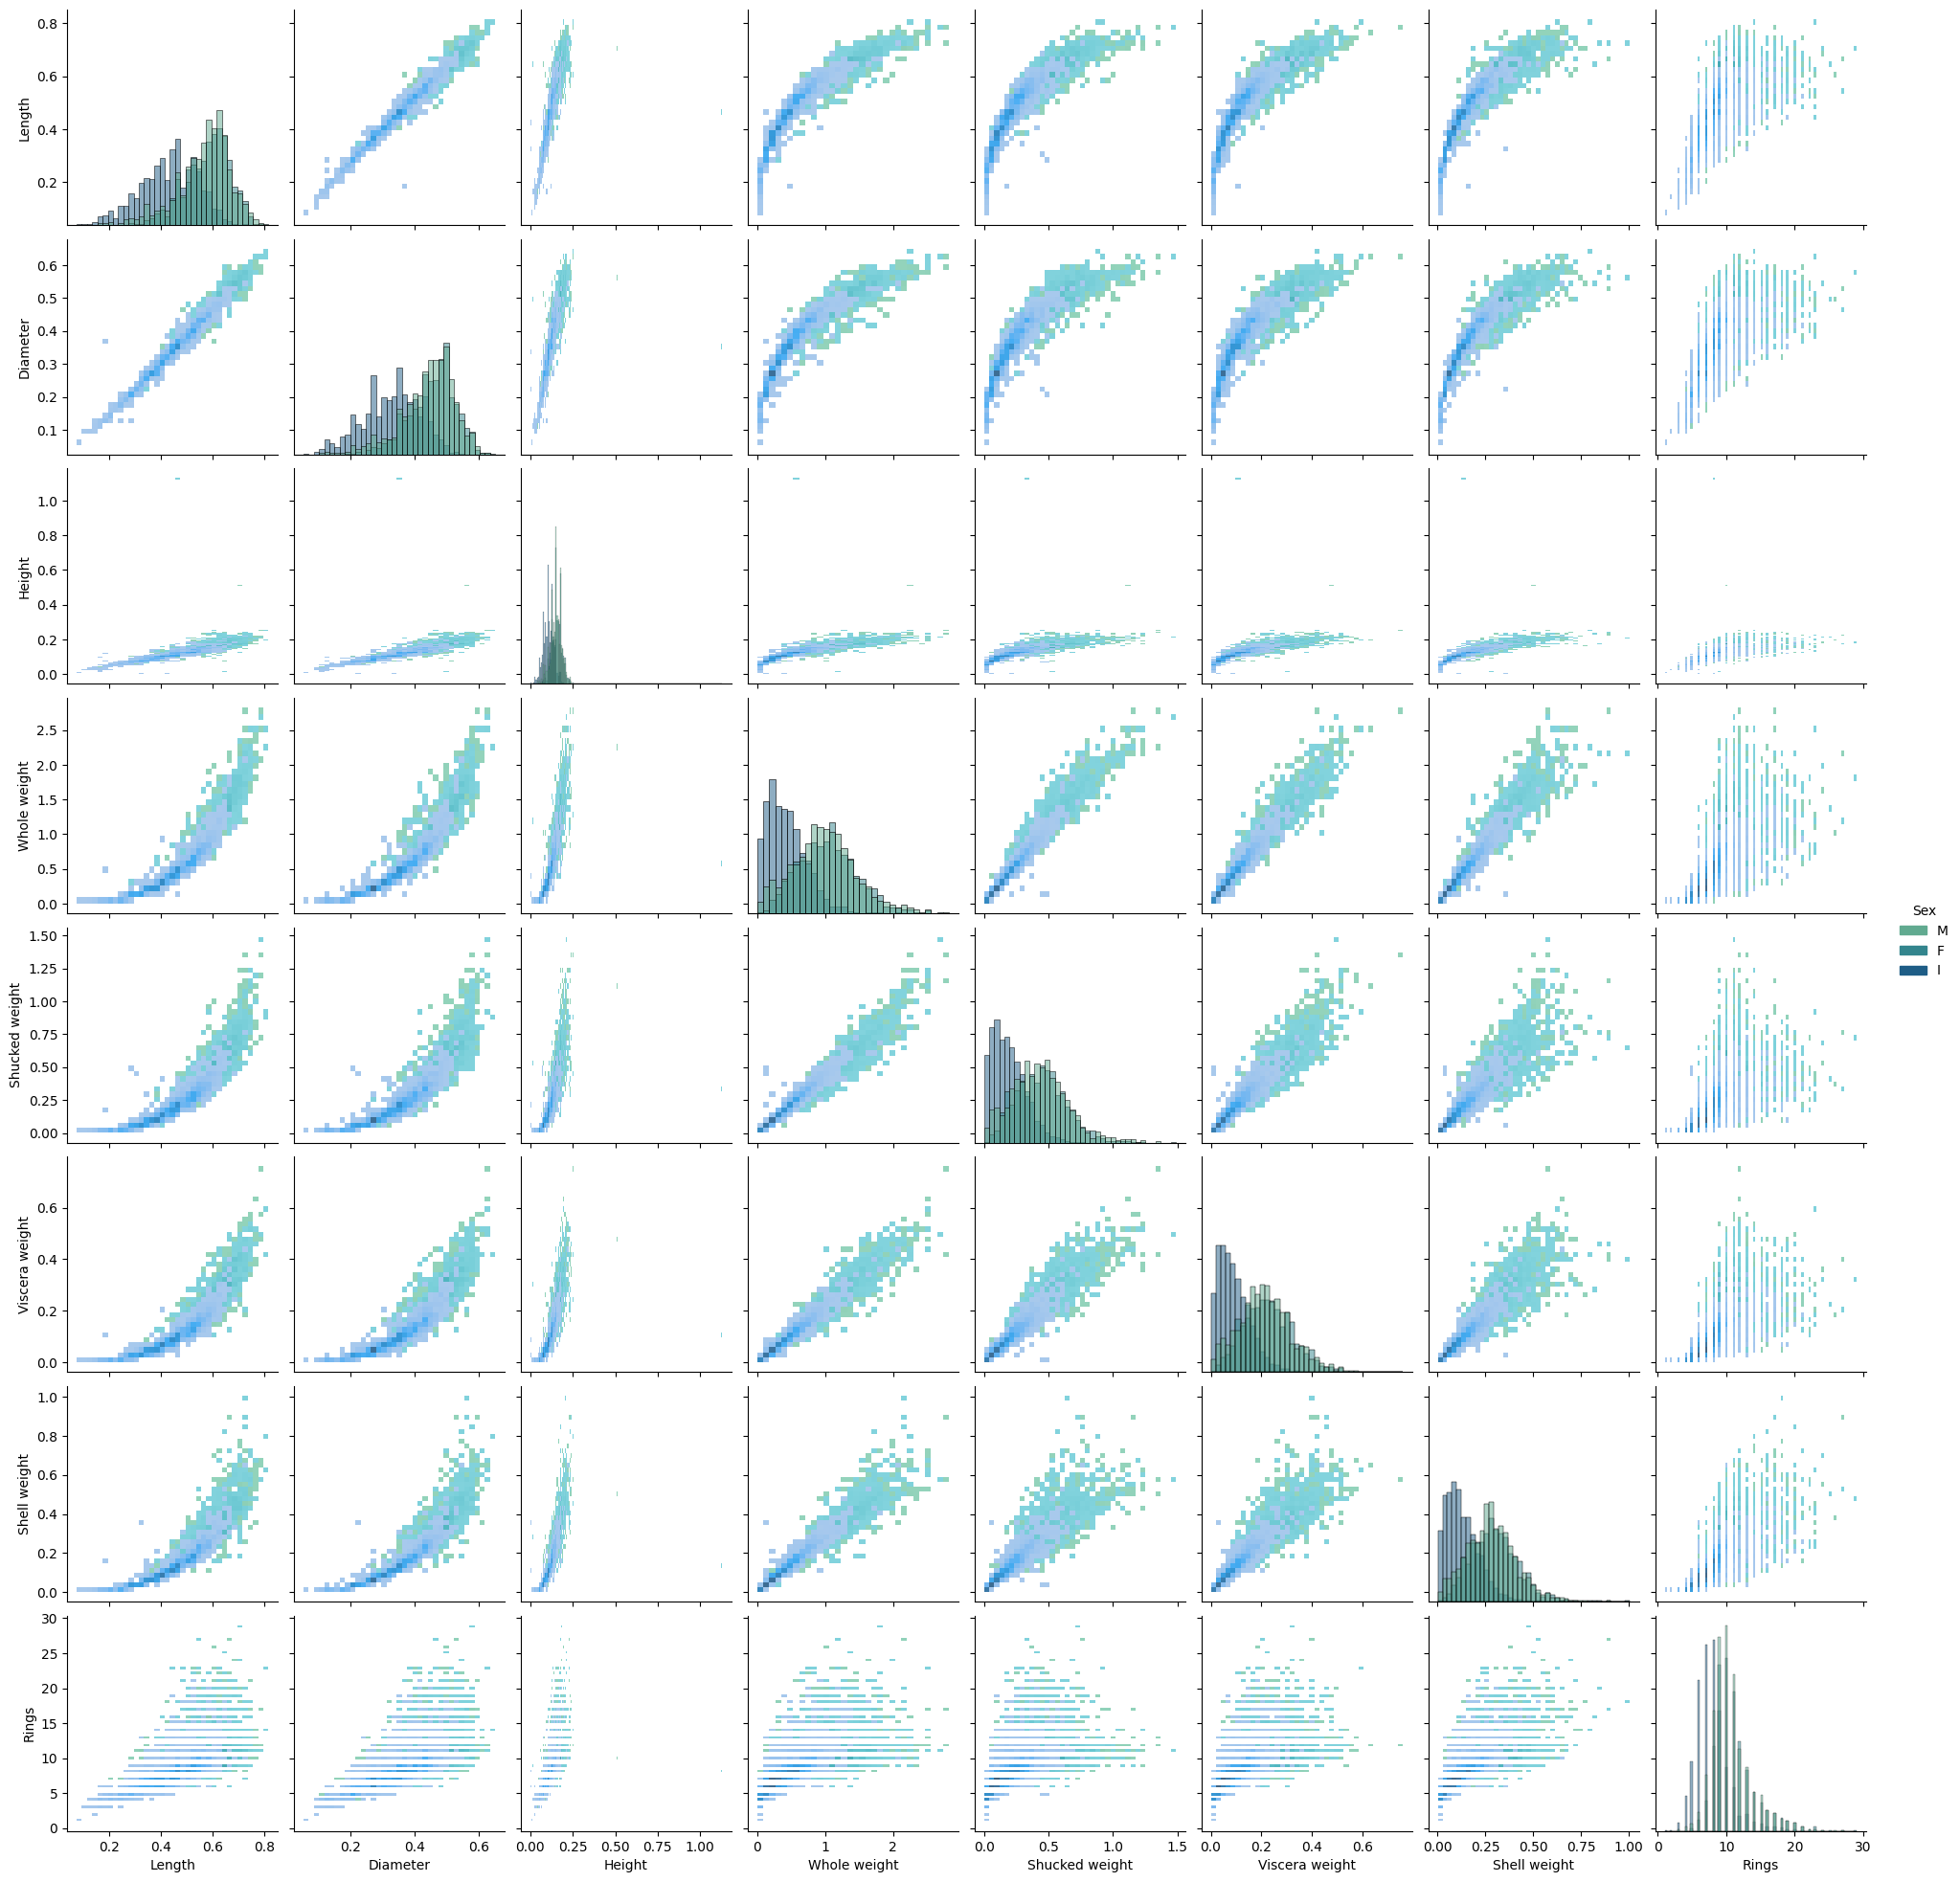

In [7]:
sns.pairplot(data=df,hue="Sex",kind="hist",palette="crest")
plt.show()

In [8]:

gender={df["Sex"].unique()[i]:i for i in range(3)}

df["Sex"]=[gender[i] for i in df["Sex"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [9]:
X=df.drop(columns=["Rings"])
y=df["Rings"]
X=X.astype(np.float64)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
y_train.info()

<class 'pandas.core.series.Series'>
Index: 3341 entries, 4038 to 860
Series name: Rings
Non-Null Count  Dtype
--------------  -----
3341 non-null   int64
dtypes: int64(1)
memory usage: 52.2 KB


In [10]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5427053625654411

In [11]:
y_pred=model.predict(X_test)

print(mean_absolute_percentage_error(y_test,y_pred))

0.16246883984429392
